In [2]:
import encode, source, output, additions
from note import Note
import numpy as np
import math
# try to play A440, reduce the volume
sound = source.sine(440, 2)
output.play(sound)
volume = 0.5
output.play(volume*sound)

In [2]:
# writes to wave file
# output.save_wave(wave_inp, 'test.wav')

In [4]:
onesec_adj = lambda freq, phase: source.sine(freq, .2, phase=phase)

In [5]:
sounds = []
for freq in np.arange(440, 550, 1):
    phase = additions.get_phase(sounds[-1]) if len(sounds) > 0 else 0
    sounds.append(onesec_adj(freq, phase))
output.play(np.concatenate([s[:-1] for s in sounds]))
# for s in sounds:
#     print('first intensity:', s[0:3])
#     print()
#     print('last intensity:', s[-4:-1])

KeyboardInterrupt: 

970200


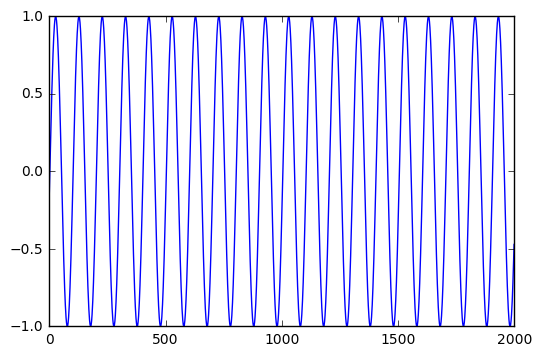

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
sound = np.concatenate(sounds)
print(len(sound))
plt.plot(sound[1000:3000])

In [6]:
import pandas as pd
song = pd.read_csv('music_notes/loch_lomond.csv')
song.columns = [c.strip() for c in song.columns.values]
notes = song.loc[:50,['pitch (as sharps)', 'octave']]
llnotes = []
for i in range(notes.shape[0]):
    note = notes.iloc[i]['pitch (as sharps)']
    octave = int(notes.iloc[i]['octave'])
    llnotes.append(Note(note).at_octave(octave))

In [7]:
ll_freq = [n.frequency() for n in llnotes]
sounds = []
for freq in ll_freq:
    phase = additions.get_phase(sounds[-1]) if len(sounds) > 0 else 0
    sounds.append(onesec_adj(freq, phase))
sound = np.concatenate([s[:-1] for s in sounds])

In [8]:
print(len(sound))
output.play(sound)

449769
